In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("co2_emissions.csv")
data_vehicles = pd.read_csv("veiculos_emissoes.csv")

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

In [4]:
data_vehicles = data_vehicles.dropna(subset=['Engine Size(L)', 'CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)'])

In [5]:
print("Análise Estatística Descritiva - Emissões CO2 por Setor")
print(data['value'].describe())
print("\n")

Análise Estatística Descritiva - Emissões CO2 por Setor
count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64




In [6]:
print("Análise Estatística Descritiva - Emissões CO2 por Veículo")
print(data_vehicles['CO2 Emissions(g/km)'].describe())
print("\n")

Análise Estatística Descritiva - Emissões CO2 por Veículo
count    7385.000000
mean      250.584699
std        58.512679
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64




### Pergunta 1: Qual a distribuição geral das emissões globais de CO2 por setor econômico?

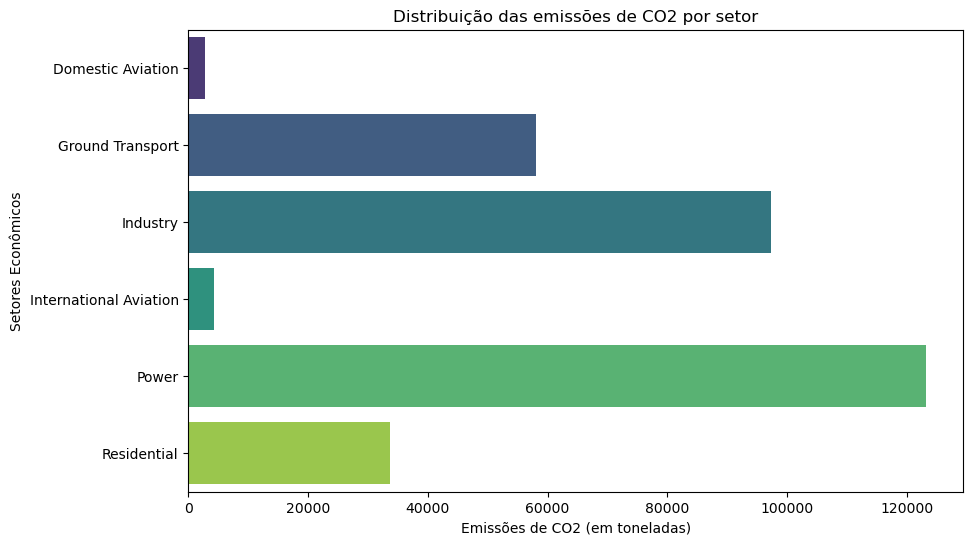

In [7]:
emissions_by_sector = data.groupby('sector')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='sector', data=emissions_by_sector, palette='viridis')
plt.title('Distribuição das emissões de CO2 por setor')
plt.xlabel('Emissões de CO2 (em toneladas)')
plt.ylabel('Setores Econômicos')
plt.show()

Pode se notar que as pricipais emissoras de CO2 seriam a Power e a Industry e transporte terrestre, podendo assim definir as áreas que merecem mais atenção

### Pergunta 2: Quanto CO2 foi emitido e quais seus principais contribuentes?

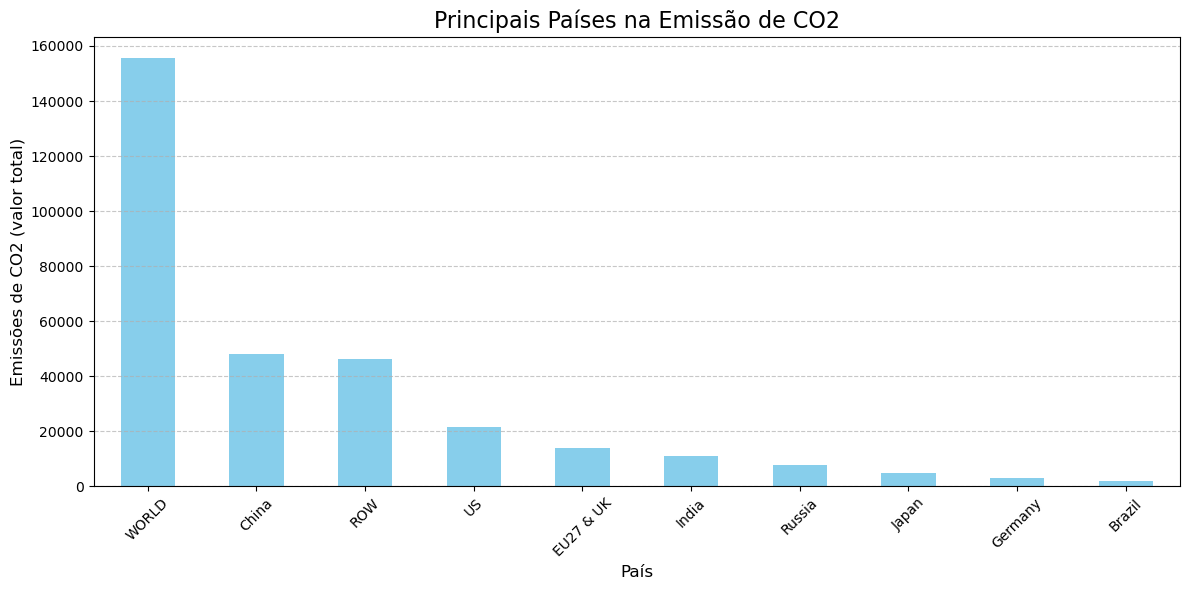

In [8]:
country_emissions = data.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
country_emissions.plot(kind='bar', color='skyblue')
plt.title('Principais Países na Emissão de CO2', fontsize=16)
plt.ylabel('Emissões de CO2 (valor total)', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pergunta 3: Como o impacto das emissões de CO2 de diferentes setores econômicos varia ao longo do tempo no Brasil?


c:\Users\luanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\luanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


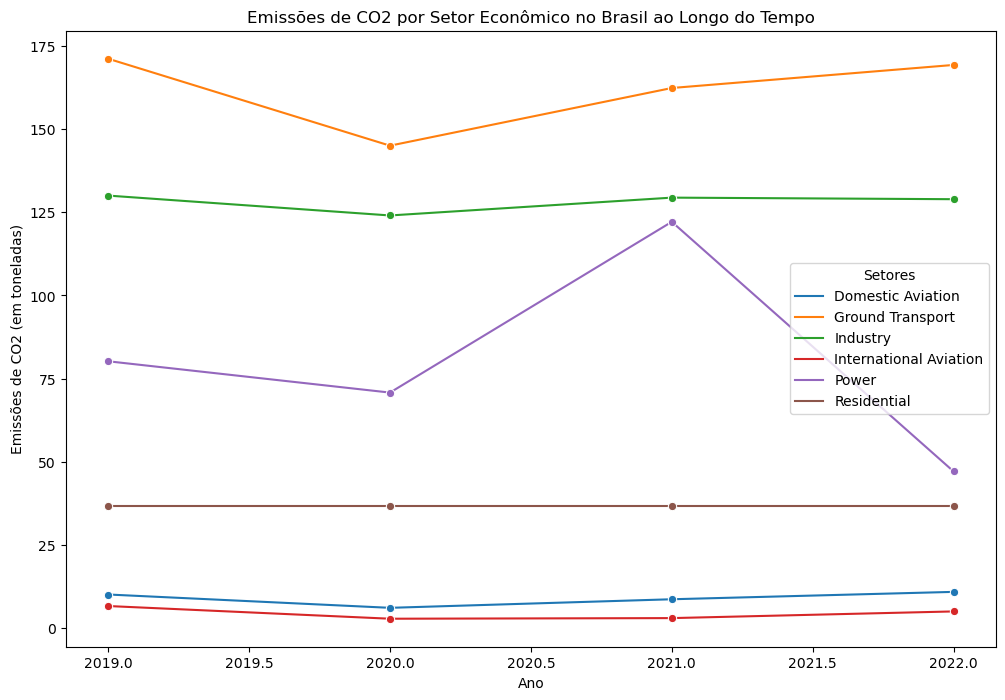

In [9]:
brasil_data = data[data['country'] == 'Brazil']

# Agrupando por setor e data
emissions_by_sector_time = brasil_data.groupby([brasil_data['date'].dt.year, 'sector'])['value'].sum().reset_index()

# Filtrando as datas até 2022
emissions_by_sector_time = emissions_by_sector_time[emissions_by_sector_time['date'] <= 2022]

# Visualização
plt.figure(figsize=(12, 8))
sns.lineplot(data=emissions_by_sector_time, x='date', y='value', hue='sector', marker='o')
plt.title('Emissões de CO2 por Setor Econômico no Brasil ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO2 (em toneladas)')
plt.legend(title='Setores')
plt.show()


Foi removido o ano de 2023 do gráfico pois por uma falta de dados desse ano estava tendo uma queda muito grande no gráfico, dificultando o entendimento correto

### Pergunta 4: Como o Brasil se compara aos Estados Unidos na emissão de CO2?

In [10]:
brasil_total = brasil_data['value'].sum()
usa_data = data[data['country'] == 'US']
usa_total = usa_data['value'].sum()

porcentagem_brasil = (brasil_total / usa_total) * 100

print(f"Total de emissões do Brasil: {brasil_total:.2f}")
print(f"Total de emissões dos Estados Unidos: {usa_total:.2f}")
print(f"O Brasil representa {porcentagem_brasil:.2f}% das emissões dos Estados Unidos.")

Total de emissões do Brasil: 1836.47
Total de emissões dos Estados Unidos: 21631.82
O Brasil representa 8.49% das emissões dos Estados Unidos.


### Pergunta 5: Quais países da OCDE têm emissões similares às do Brasil?

In [11]:
ocde_countries = ['US', 'Germany', 'France', 'Japan', 'Italy', 'Spain', 'UK']
ocde_data = data[data['country'].isin(ocde_countries)]

similar_ocde = ocde_data.groupby('country')['value'].sum().reset_index()
similar_ocde = similar_ocde[abs(similar_ocde['value'] - brasil_total) < 1e6]  # Diferença de até 1 milhão

print(similar_ocde)

   country         value
0   France   1328.491333
1  Germany   2951.018676
2    Italy   1423.104886
3    Japan   4722.530409
4    Spain   1099.732535
5       UK   1605.296587
6       US  21631.820344


### Pergunta 6: Quais setores são mais responsáveis pelas emissões de CO2 no Brasil?

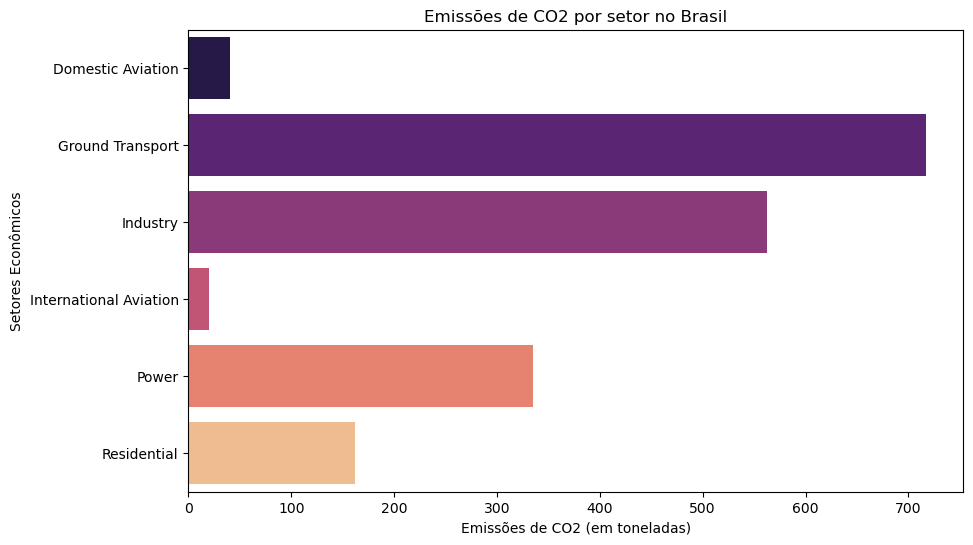

O setor de Transporte Terrestre é o principal responsável pelas emissões de CO2 no Brasil.


In [12]:
brasil_by_sector = brasil_data.groupby('sector')['value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='value', y='sector', data=brasil_by_sector, palette='magma')
plt.title('Emissões de CO2 por setor no Brasil')
plt.xlabel('Emissões de CO2 (em toneladas)')
plt.ylabel('Setores Econômicos')
plt.show()

print('O setor de Transporte Terrestre é o principal responsável pelas emissões de CO2 no Brasil.')

### Agora que sabemos que o principal emissor do Brasil são os veiculos terrestres, vamos fazer uma análise sobre o motivo

### Pergunta 7: Quais são as médias e desvios padrões das emissões de CO2 por tipo de combustível?

In [13]:
fuel_co2_avg = data_vehicles.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)
fuel_co2_std = data_vehicles.groupby('Fuel Type')['CO2 Emissions(g/km)'].std().sort_values(ascending=False)

fuel_stats = pd.DataFrame({
    'Média de Emissões CO2': fuel_co2_avg,
    'Desvio Padrão': fuel_co2_std
})

print(fuel_stats)

           Média de Emissões CO2  Desvio Padrão
Fuel Type                                      
D                     237.548571      41.817704
E                     275.091892      47.093198
N                     213.000000            NaN
X                     235.119329      57.401473
Z                     266.043410      56.695972


### Pergunta 8: Como o tamanho do motor e o consumo de combustível afetam as emissões de CO2?

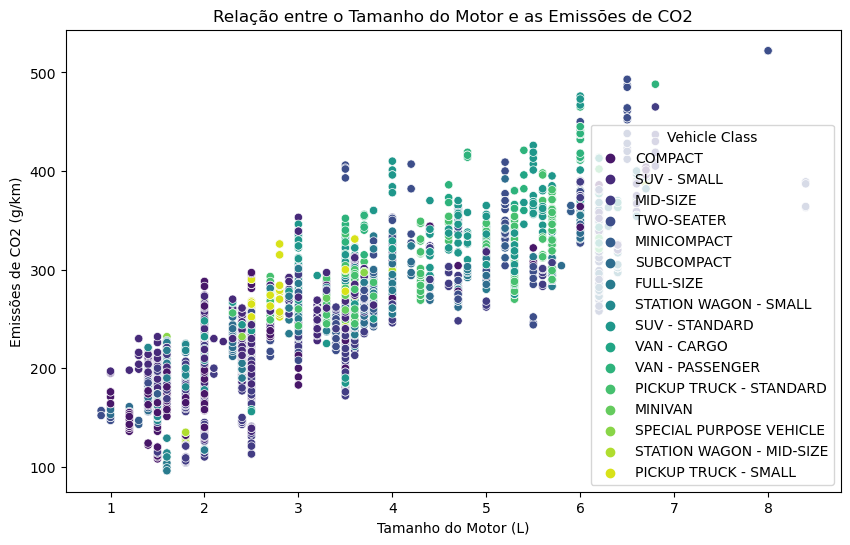

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_vehicles, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Vehicle Class', palette='viridis')
plt.title('Relação entre o Tamanho do Motor e as Emissões de CO2')
plt.xlabel('Tamanho do Motor (L)')
plt.ylabel('Emissões de CO2 (g/km)')
plt.show()

Embora a regra geral seja que motores maiores tendem a emitir mais CO2, podemos observar vários exemplos de motores grandes que emitem relativamente pouco, demonstrando que essa relação não é uma regra absoluta, precisando somente de um esfoço a mais para tornar eles o padrão.

### Pergunta 9: Quais são as emissões médias de CO2 para cada tipo de transmissão?

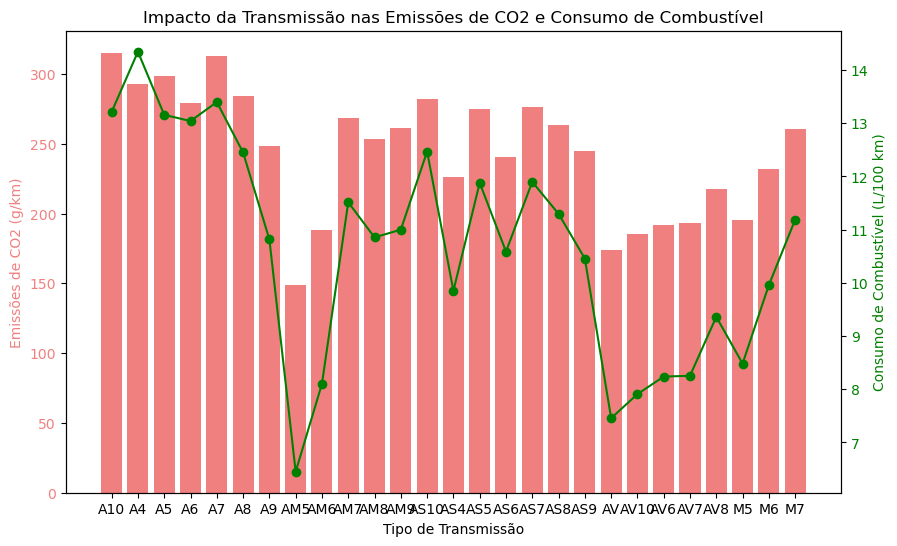

In [15]:
transmission_co2_avg = data_vehicles.groupby('Transmission')['CO2 Emissions(g/km)'].mean()
transmission_fuel_avg = data_vehicles.groupby('Transmission')['Fuel Consumption Comb (L/100 km)'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(transmission_co2_avg.index, transmission_co2_avg, color='lightcoral', label='CO2 Emissions (g/km)')
ax1.set_xlabel('Tipo de Transmissão')
ax1.set_ylabel('Emissões de CO2 (g/km)', color='lightcoral')
ax1.tick_params(axis='y', labelcolor='lightcoral')

ax2 = ax1.twinx()
ax2.plot(transmission_fuel_avg.index, transmission_fuel_avg, color='green', marker='o', label='Consumo Combustível (L/100 km)')
ax2.set_ylabel('Consumo de Combustível (L/100 km)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Impacto da Transmissão nas Emissões de CO2 e Consumo de Combustível')
plt.show()

Podemos identificar um claro outlier: a transmissão "AM", que apresenta um consumo de combustível significativamente menor em comparação aos demais, mantendo também uma baixa emissão de CO2.

### Pergunta 10: Utilizando um modelo de aprendizagem, conseguimos prever qual é a emissão de um veiculo pelas suas características?

In [16]:
# Preparando os dados para o modelo
data_vehicles = data_vehicles.dropna(subset=['Engine Size(L)', 'CO2 Emissions(g/km)', 'Fuel Consumption Comb (L/100 km)'])
X = data_vehicles[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']]
y = data_vehicles['CO2 Emissions(g/km)']

# Codificando as variáveis numéricas
X['Fuel Consumption Comb (L/100 km)'] = X['Fuel Consumption Comb (L/100 km)'].astype(float)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo de árvore de decisão
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Previsões e avaliação
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Acurácia do modelo Decision Tree:", accuracy)
print("Matriz de Confusão:")
print(cm)

Acurácia do modelo Decision Tree: 0.3731949458483754
Matriz de Confusão:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


C:\Users\luanm\AppData\Local\Temp\ipykernel_21952\1515366543.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fuel Consumption Comb (L/100 km)'] = X['Fuel Consumption Comb (L/100 km)'].astype(float)


### Pergunta 10(extra): Podemos prever as emissões de CO2 de um veículo com base no tamanho do motor e no consumo combinado de combustível?


In [17]:
X = data_vehicles[['Engine Size(L)', 'Fuel Consumption Comb (L/100 km)']]
y = data_vehicles['CO2 Emissions(g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro médio quadrado (MSE):", mse)
print("Coeficiente de determinação (R²):", r2)

Erro médio quadrado (MSE): 440.6404494113608
Coeficiente de determinação (R²): 0.8695444453288923


### Conclusão:
A análise dos dados revelou que os principais emissores de CO2 globalmente são a China e os Estados Unidos, com destaque para os setores de Indústria, Geração de Energia e Transporte Terrestre. Esses setores desempenham um papel crucial no aumento das emissões de carbono, evidenciando a necessidade urgente de investir em fontes de energia limpa e em tecnologias de transporte mais sustentáveis. A busca por alternativas ecológicas, como energias renováveis e veículos com menor impacto ambiental, é essencial para mitigar os efeitos das mudanças climáticas e promover um futuro mais sustentável.

## Observação extra:

Professor tentei cumprir todos os requisitos somente nas 10 únicas perguntas, mas como senti que era muito pouco para tudo acabei colocando o "Extra" para ter duas perguntas de machine learning, espero que não seja um problema.